# Random forest

We've used a decision tree before, but isn't a random forest supposed to be a better version of the decision tree? Let's try!

## Data import

We exported the data before into a pickle-file. That means we can quite simply import it here again.

In [1]:
import pickle

# Load the pickle file
with open('exports/non_linear_data.pkl', 'rb') as file:
    data_dict = pickle.load(file)

# Display the loaded data

X_train = data_dict["X_train"]
X_test = data_dict["X_test"]
y_train = data_dict["y_train"]
y_test = data_dict["y_test"]

## Create model

With all the data ready in files, creating and training the model shouldn't be a problem.

In [2]:
#DELETE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Create and fit the Random Forest Regressor
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train.ravel())

y_pred_forest = random_forest_regressor.predict(X_test)

rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))
print(f"RMSE for Random forest: {rmse_forest}")

RMSE for Random forest: 2.521217027905097


We get an RMSE of 2.52, which is worse than the 2.26 that a decision tree got. How do they compare?

First we'll import the y-predictions of the decision tree. This way we can compare the graphs.

In [3]:
with open('exports/y_pred_tree.pkl', 'rb') as file:
    y_pred_tree = pickle.load(file)

And now you're ready to copy, paste and adapt the code for the graphs!

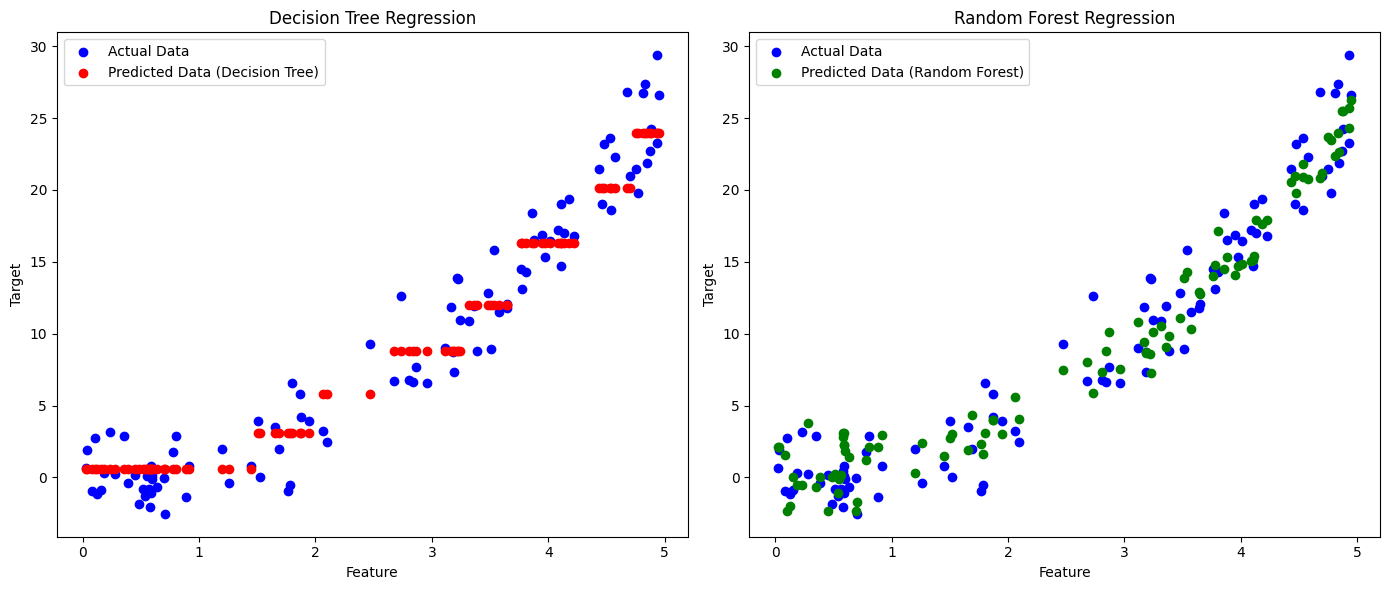

In [4]:
#DELETE
import matplotlib.pyplot as plt
# Plotting the results
plt.figure(figsize=(14, 6))

# Plot Linear Regression results
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred_tree, color='red', label='Predicted Data (Decision Tree)')
plt.title('Decision Tree Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Plot Decision Tree Regression results
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred_forest, color='green', label='Predicted Data (Random Forest)')
plt.title('Random Forest Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.tight_layout()
plt.show()

We see the random forest predictions aren't on a line like the decision tree. That is because it takes the average of many different trees as the output value.

It's still less good, so what could be the cause there? The problem is we didn't do any tuning on our model. Because:

![](files/2025-05-09-19-20-34.png)

## Random forest tuning

Our 500 datapoints are not a big dataset. That's why when doing hyperparameter tuning a kfold-algorithm is a good idea. Implement it with the following parametergrid:

```Python
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples required to be at a leaf node
}
```

Note how we now have 4-dimensional grid with 3x4x3x3 fields, totalling 108 models. Every one of these 108 models is then tested against 5 folds, leading 504 models to train. Best to give it some time.

In [5]:
#DELETE

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples required to be at a leaf node
}

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Negate because we used neg_mean_squared_error

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validated MSE: {best_score:.2f}')

# Make predictions with the best model
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Calculate Mean Squared Error on the test set
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest with Best Params): {mse_rf:.2f}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Scripts\Cello_AI\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validated MSE: 4.65
Mean Squared Error (Random Forest with Best Params): 4.34


About 16 seconds on my PC. Not too bad.

Retrain the model with the parameters we just got.

In [6]:
#DELETE
from sklearn.ensemble import RandomForestRegressor

# Create and fit the Random Forest Regressor
random_forest_regressor = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=5, min_samples_leaf=4, min_samples_split=10)
random_forest_regressor.fit(X_train, y_train.ravel())

y_pred_forest = random_forest_regressor.predict(X_test)

rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))
print(f"RMSE for Random forest: {rmse_forest}")

RMSE for Random forest: 2.0839281705257386


RMSE now dips significantly below the RMSE of a decision tree. This should show in the data as well. Recreate the graphs!

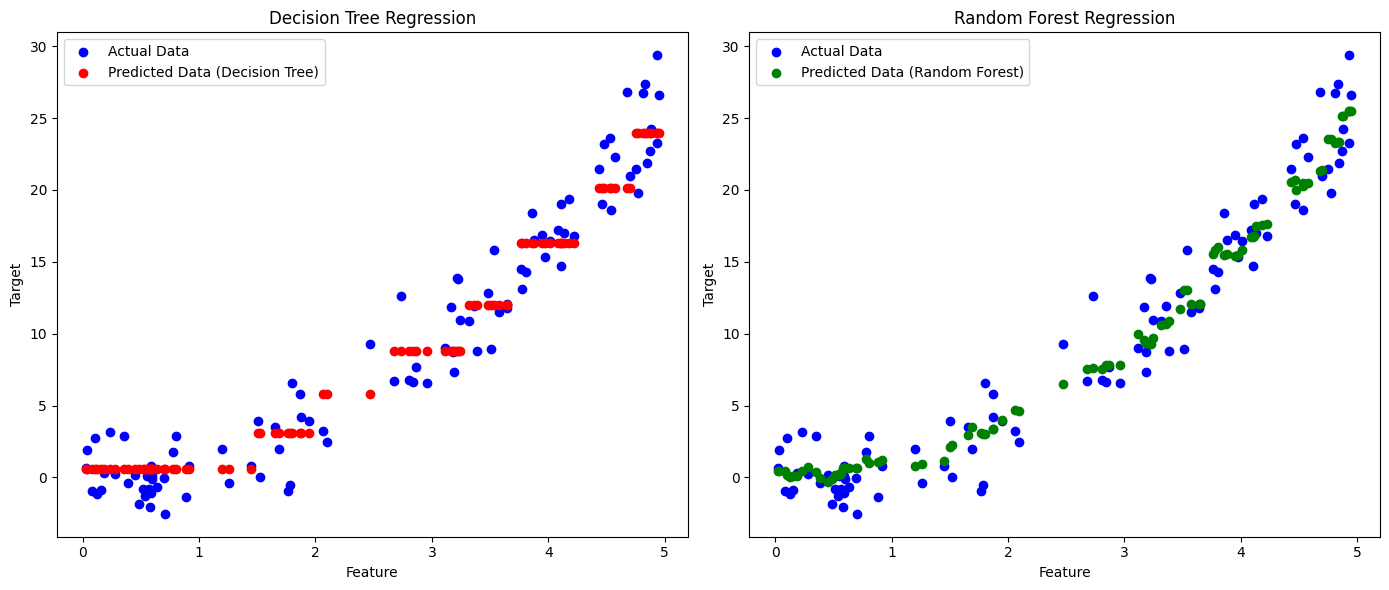

In [7]:
#DELETE
# Plotting the results
plt.figure(figsize=(14, 6))

# Plot Linear Regression results
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred_tree, color='red', label='Predicted Data (Decision Tree)')
plt.title('Decision Tree Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Plot Decision Tree Regression results
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred_forest, color='green', label='Predicted Data (Random Forest)')
plt.title('Random Forest Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.tight_layout()
plt.show()

The data now resembles the original idea, a quadratic equation, very well. The offset we're seeing is the noise that was (deliberatly) inserted into the model. That also means our model succeeded in filtering out that noise.

Let's remember the number to beat: 2.084.

In [8]:
with open('exports/y_pred_randomforest.pkl', 'wb') as f:
    pickle.dump(y_pred_forest, f)